In [1]:
#LIBRERÍAS NECESARIAS
library("FNN")
library("MASS")
library("stats")
library("readr")
library("caret")
library("e1071")
library("mclust")
library("sparcl")
library("kohonen")
library("cluster")
library("fields")
library(tree)
library(class)
library(randomForest)
library(tsne)
library(Rtsne)

Warning message:
"package 'FNN' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'kohonen' was built under R version 3.5.3"
Attaching package: 'kohonen'

The following object is masked from 'package:mclust':

    map

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

The f

# · Creación del dataset

In [3]:
corazon=read.csv('corazon_r.csv', header = TRUE, sep = ',')
corazon=corazon[,-1]
bazo=read.csv('bazo_r.csv',header=TRUE)
bazo=bazo[,-1]
glandula=read.csv('glandula_r.csv',header=TRUE)
glandula=glandula[,-1]
timo=read.csv('timo_r.csv', header = TRUE, sep = ',')
timo=timo[,-1]
pulmon=read.csv('pulmon_r.csv',header=TRUE)
pulmon=pulmon[,-1]
rinon=read.csv('riñon_r.csv',header=TRUE)
rinon=rinon[,-1]
medula=read.csv('medula_r.csv', header = TRUE, sep = ',')
medula=medula[,-1]
vejiga=read.csv('vejiga_r.csv',header=TRUE)
vejiga=vejiga[,-1]
higado=read.csv('higado_r.csv',header=TRUE)
higado=higado[,-1]

df=rbind(corazon,bazo,glandula,timo,pulmon,rinon,medula,vejiga,higado)
dim(df)

[1]  3600 23434

### Sepamos en train y test

In [4]:
y=df$etiqueta
x=df[,-ncol(df)]

In [5]:
set.seed(2)
indtrain = sample(1:3600, round(0.75*3600))
indtest = setdiff(1:3600, indtrain)
df.occ=data.frame(y, x)
df.train=df.occ[indtrain,]
df.test=df.occ[indtest,]

# · Clasificación con todos los datos

### KNN (dura mucho tiempo)

In [10]:
## predicción sobre test con k=1
predd=knn(df.train[,-1],df.test[,-1],df.train$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 95  1  8  0  5  4  1  0  0
         2  0 85  9  0  1  2  2  0  2
         3  4  0 80  0  1  7  0  4  2
         4  0  1  0 97  0  0  0  0  0
         5  1  1  3  0 89  2  0  1  1
         6  3  1  3  0  8 83  5  3  1
         7  0  3  3  1  0  7 88  0  1
         8  2  0  2  0  4  3  1 89  0
         9  0  1  3  0  0  0  0  0 76

Overall Statistics
                                          
               Accuracy : 0.8689          
                 95% CI : (0.8451, 0.8903)
    No Information Rate : 0.1233          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8524          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.9048  0.91398  0.72072   0.9898  0.82407  0.76852
Specificity            0.9761 

# · Segmentación con todos los datos

### K-means

In [16]:
kmModel<-kmeans(df[,-ncol(df)],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster        3600 -none- numeric
centers      210897 -none- numeric
totss             1 -none- numeric
withinss          9 -none- numeric
tot.withinss      1 -none- numeric
betweenss         1 -none- numeric
size              9 -none- numeric
iter              1 -none- numeric
ifault            1 -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0 119   0   0   0 276   1   4   0
         2   0   4   3   0  14 168 185  26   0
         3   5 240   0   0   0 106  40   9   0
         4   0   0   0   0   0  53   2   0 345
         5   3  76   0 102  81  43   0  95   0
         6   0  42   0   0   0 261  39  58   0
         7   0   2  80   0   0 231  69  18   0
         8   0 134   0   0   0 263   1   2   0
         9 135  21   1   0   0  28 202  13   0

Overall Statistics
                                          
               Accuracy : 0.1158          
                 95% CI : (0.1056, 0.1267)
    No Information Rate : 0.3969          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0053          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

### t-sne y Rt-sne

sigma summary: Min. : 0.242991452172599 |1st Qu. : 0.380731556993581 |Median : 0.453463990647119 |Mean : 0.501735320331052 |3rd Qu. : 0.583038273657775 |Max. : 1.73745720757266 |
Epoch: Iteration #100 error is: 18.0257766749183
Epoch: Iteration #200 error is: 1.51406096513607
Epoch: Iteration #300 error is: 1.31433889973708
Epoch: Iteration #400 error is: 1.23146196631947
Epoch: Iteration #500 error is: 1.19836993963709
Epoch: Iteration #600 error is: 1.18091792371074
Epoch: Iteration #700 error is: 1.17030459525304
Epoch: Iteration #800 error is: 1.16330682000635
Epoch: Iteration #900 error is: 1.15837712719624
Epoch: Iteration #1000 error is: 1.15469853660773


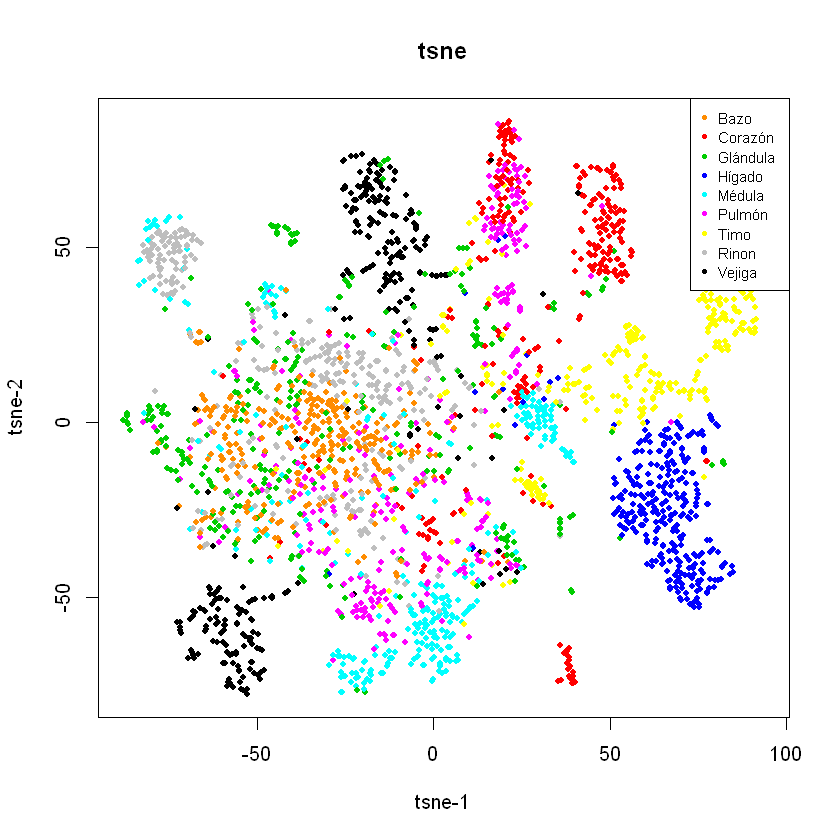

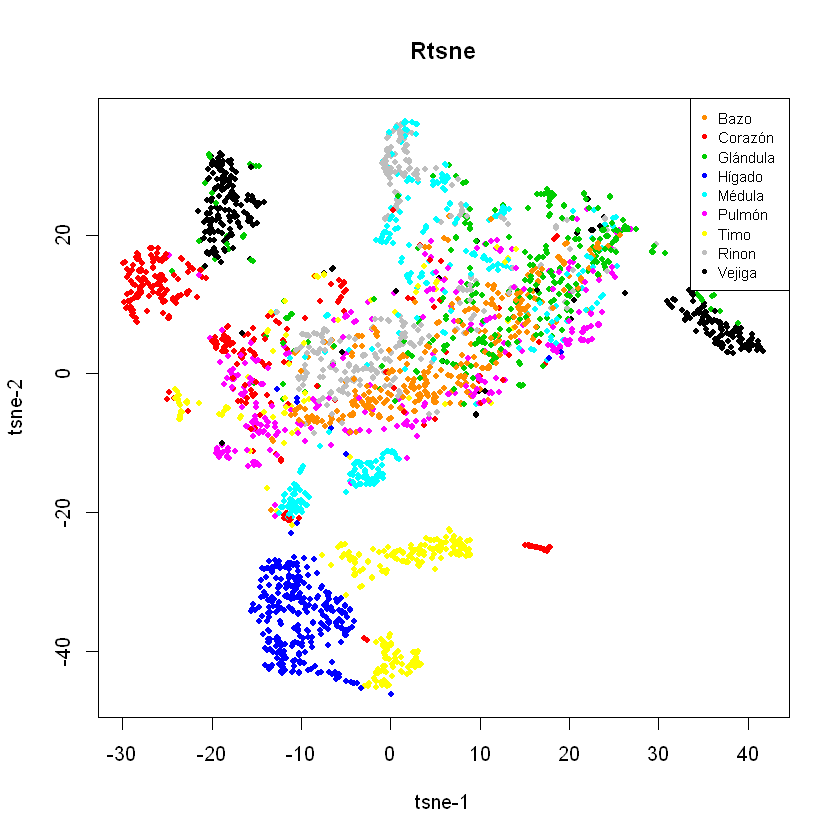

In [6]:
rtsne <- Rtsne(df.train[,2:1000],check_duplicates = FALSE)
tsne <- tsne(df.train[,2:1000])
colors=as.numeric(df.train$y)
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [8]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   3   0   0   0  10  92  28   2 174
         2  43 178   8   3  46   1   3   1  13
         3  28  24   0  17  24 104  29  38  42
         4   9   3  13 270   1   0   1   0   0
         5  63   0   0   0 160  14  17  37  17
         6  24  79   1   0  92  24  17   5  52
         7  76  11 184   2  14   1   3   0   5
         8  16   0   0   1  16  33  16  89 123
         9  12  28   0   0   8   4 115 123  10

Overall Statistics
                                          
               Accuracy : 0.273           
                 95% CI : (0.2562, 0.2902)
    No Information Rate : 0.1615          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1821          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [9]:
#rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  12   0   0  83 144   7   0   0  63
         2  96   0  24   6  15   4 129   2  20
         3  16  16   0 160  72  20  22   0   0
         4   3   0   0   2   0   0   0 287   5
         5   8   0   0  66  28  86   0   0 120
         6  59   0   0  77  72   5   2   0  79
         7  54   0  99   7  11   1   0 113  11
         8  71   1   0  25  90  96   0   0  11
         9   5 114   0  11   7   1 161   0   1

Overall Statistics
                                          
               Accuracy : 0.0178          
                 95% CI : (0.0131, 0.0235)
    No Information Rate : 0.1626          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.1051         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3  Class: 4 Class: 5 Class: 6
Sensitivity   

In [7]:
# ## calling the installed package
library(Rtsne)
## for plotting
colors = rainbow(length(as.factor(df.train$y)))
names(colors) = unique(as.factor(df.train$y))

## Executing the algorithm on curated data
tsne <- Rtsne(df.train[,2:1000], dims = 3,max_iter = 1500)

In [8]:
d_tsne_1 = as.data.frame(tsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0 124   9   0   0 141  21   0
         2   0   0  26   2  13 133  15 118   0
         3   0  13 113 108   0   4  35  10   6
         4  19   0   1   0 274   0   1   7   0
         5   0   0  56  11  59   0  88  36  42
         6   1   0 117   7   2   2  72  91   0
         7 182   0  20   0  27  15  10  49   0
         8   0   0  26  12   0   0 119  62  84
         9   0 171   9 126   1   5   3   2   0

Overall Statistics
                                          
               Accuracy : 0.0911          
                 95% CI : (0.0805, 0.1026)
    No Information Rate : 0.1822          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0219         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5  Class: 6
Sensitivity   

# · Correlación para quedarnos con las columnas (genes) importantes

Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), m

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"

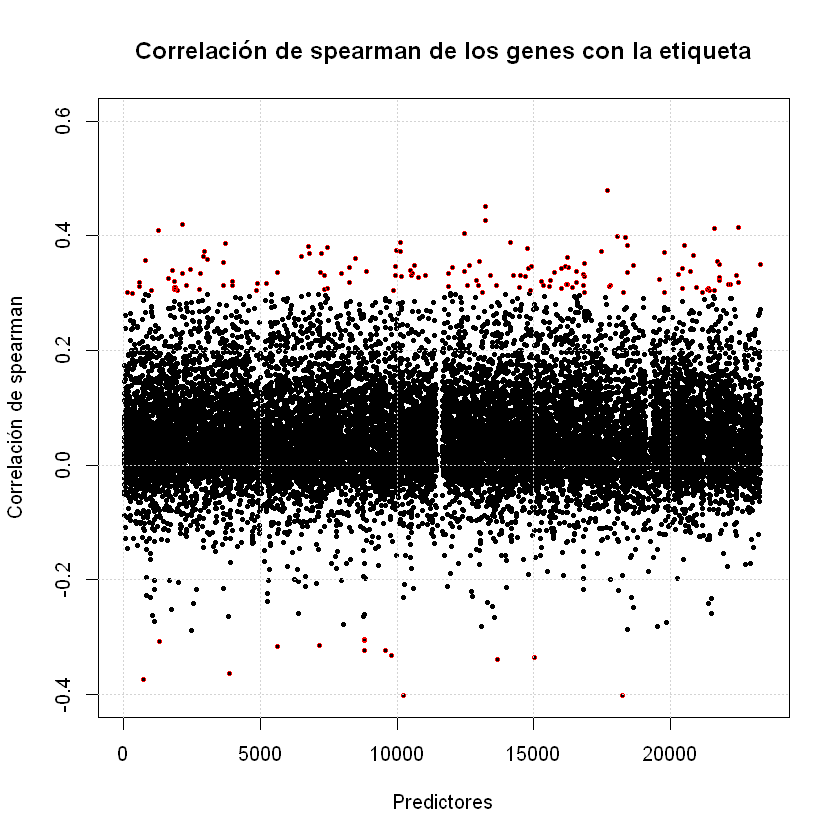

In [27]:
## correlación de spearman de cada gen con la etiqueta
r.xy = c()
for (ivar in 1:ncol(x)) {
  r.xy[ivar] = cor(as.numeric(y), as.integer((x[,ivar])), method = "spearman")
}
plot(r.xy, ylim = c(-0.4, 0.6), pch = 19, cex = 0.5, main="Correlación de spearman de los genes con la etiqueta", xlab = "Predictores", ylab = "Correlación de spearman")
grid()

ind.sele = which(abs(r.xy) > 0.3)
points(ind.sele, r.xy[ind.sele], col = "red", cex = 0.5)
#para eliminar predictores que no aportan ninguna informacion a nuestro problema (reducimos predictores)

In [9]:
length(ind.sele)

[1] 154

In [10]:
df.train2=df.train[,ind.sele]
df.test2=df.test[,ind.sele]
df.train2['y']=as.numeric(y[indtrain])
df.test2['y']=as.numeric(y[indtest])

# ·Segmentación con índices seleccionados

### t-sne y Rt-sne

sigma summary: Min. : 0.200368201804092 |1st Qu. : 0.400410176426381 |Median : 0.468579293743199 |Mean : 0.490686031486163 |3rd Qu. : 0.549685403243163 |Max. : 1.72013161599664 |
Epoch: Iteration #100 error is: 19.9535120420016
Epoch: Iteration #200 error is: 1.8363312543452
Epoch: Iteration #300 error is: 1.64289213990386
Epoch: Iteration #400 error is: 1.56022814241984
Epoch: Iteration #500 error is: 1.52799486142684
Epoch: Iteration #600 error is: 1.5113198731041
Epoch: Iteration #700 error is: 1.50138535221911
Epoch: Iteration #800 error is: 1.49514166572874
Epoch: Iteration #900 error is: 1.4908645382005
Epoch: Iteration #1000 error is: 1.48780380711644


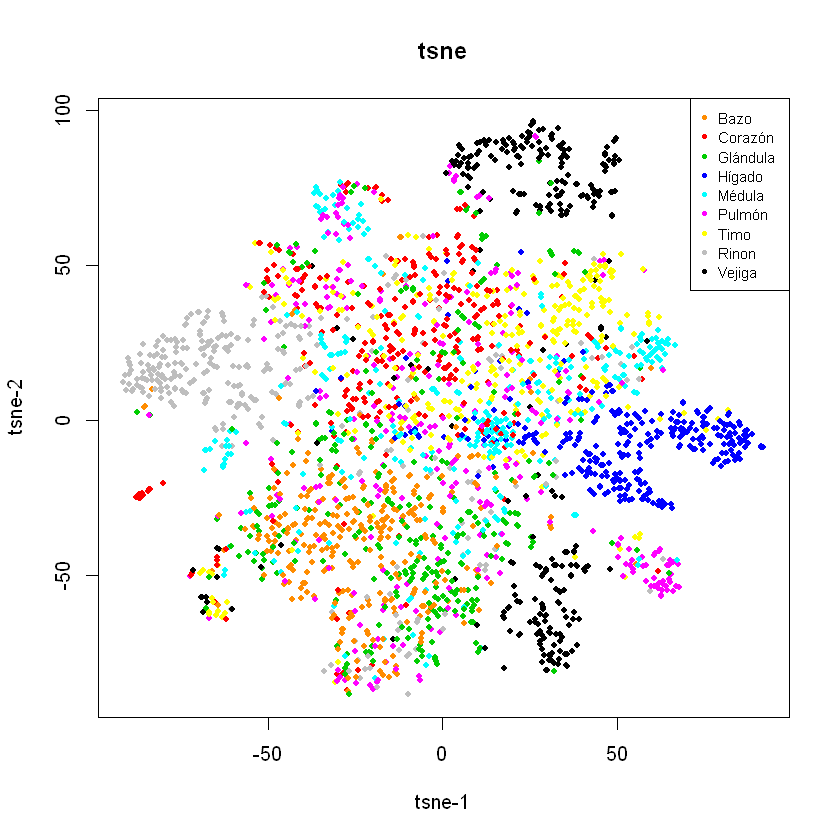

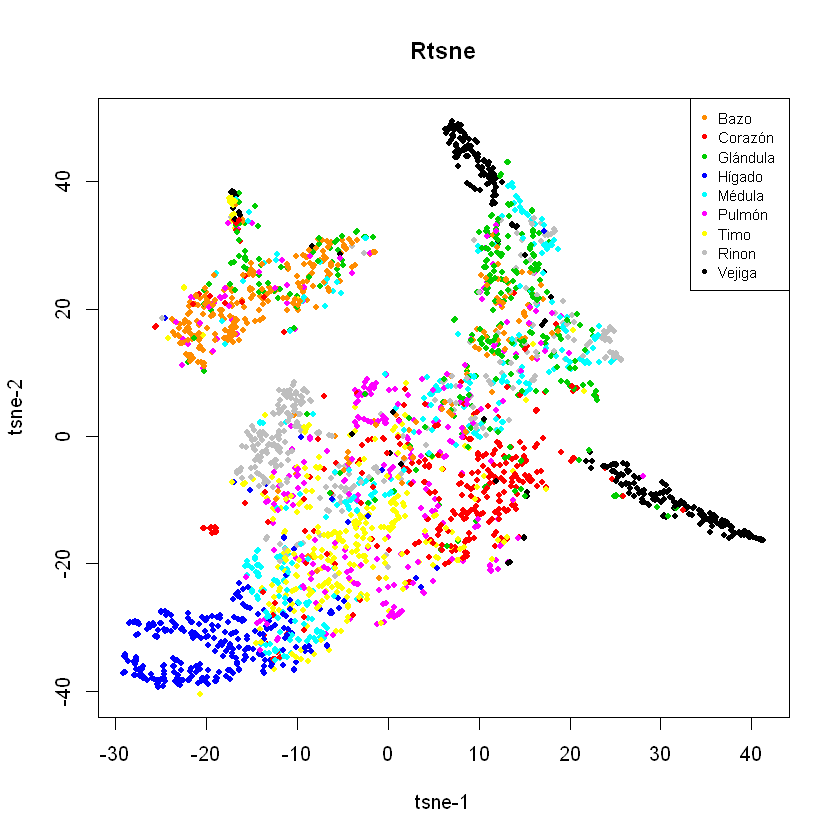

In [13]:
rtsne <- Rtsne(df.train2[,-ncol(df.train2)],check_duplicates = FALSE)
tsne <- tsne(df.train2[,-ncol(df.train2)])
colors=df.train2$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [14]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  96   4   2   7   1   6   0  56 137
         2  10  13  51   1   3 123  14  66  15
         3 111   5  19  22   4  21  11  53  60
         4   0   1  10   0 238   4   1  43   0
         5  18  20  50  13  47  60   0  85  15
         6  38   6  33  54   5  64  11  63  20
         7   2   1 134   7  18  55   1  60  18
         8  29 188  12   6   5  30   0  21   3
         9   4   0   9 108   1   3 156   6  13

Overall Statistics
                                          
               Accuracy : 0.1015          
                 95% CI : (0.0903, 0.1135)
    No Information Rate : 0.1678          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0108         
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [15]:
#-rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 225   0   4  22   9   4  45   0   0
         2  20 163  16  37  27   0  16  10   7
         3  69  16   0  27   6  61 118   0   9
         4   1   3  46   1   6   1   0 239   0
         5  24   7  96  46  31  34  59  11   0
         6  35  41  56  87  39   6  25   4   1
         7  19  54 150  17  47   0   4   5   0
         8   4   0  13  33 159  19  66   0   0
         9  12   7   0   4   1 113   5   0 158

Overall Statistics
                                          
               Accuracy : 0.2178          
                 95% CI : (0.2023, 0.2338)
    No Information Rate : 0.1515          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1197          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3  Class: 4 Class: 5 Class: 6
Sensitivity   

### K-means

In [19]:
kmModel<-kmeans(df[,ind.sele],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster      3600   -none- numeric
centers      1386   -none- numeric
totss           1   -none- numeric
withinss        9   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            9   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   4   0   0   0   0   0 269   0 127
         2  10   2   1  21  12   0  13  75 266
         3   7   1   2   0   7  16  82  71 214
         4   0   1   0   0   4   0   0  33 362
         5   4   1   0   0  17  31  30  81 236
         6   2   1   0   0  34   0  45  63 255
         7  19   0 146   0   7   1   8  46 173
         8   1   0   0   0   1 102   5   2 289
         9  13 130   0   0 109   1   1 138   8

Overall Statistics
                                          
               Accuracy : 0.0119          
                 95% CI : (0.0087, 0.0161)
    No Information Rate : 0.5361          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.1116         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2  Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity  

# · Clasificación con índices seleccionados

## GLMs

In [12]:
# #GLM
# df.train$y=as.numeric(as.character(df.train$y))
# df.test$y=as.numeric(as.character(df.test$y))

numeros2<-function(n){
    df.train2$y[which(df.train2$y != n)] <- 0 ; df.train2$y[which(df.train2$y == n)] <- 1
    df.test$y[which(df.test2$y != n)] <- 0 ; df.test$y[which(df.test2$y == n)] <- 1
    DatT <- df.train2;
    Datt<- df.test2;
    M <- glm(y~., data = DatT[,], family = binomial(link = "logit"))
    Out <- M$fitted.values
    Outbin <- as.double(Out > 0.5)
    Acct<-100*sum(diag(table(DatT[,1], Outbin))) / length(Outbin)
    Out2<- predict(object=M, newdata = Datt[,]);
    Outbin2 <- as.double(Out2 > 0.5)
    AccT<-100*sum(diag(table(Datt[,1], Outbin2))) / length(Outbin2)
    
    return(AccT) 
}
A<-c()
for (i in 1:9){ 
    A<-c(A, numeros2(i))}

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warn

In [13]:
A
print(mean(A))

[1] 78.33333 90.66667 91.77778 87.88889 93.44444 95.22222 93.33333 90.22222
[9] 86.55556

[1] 89.71605


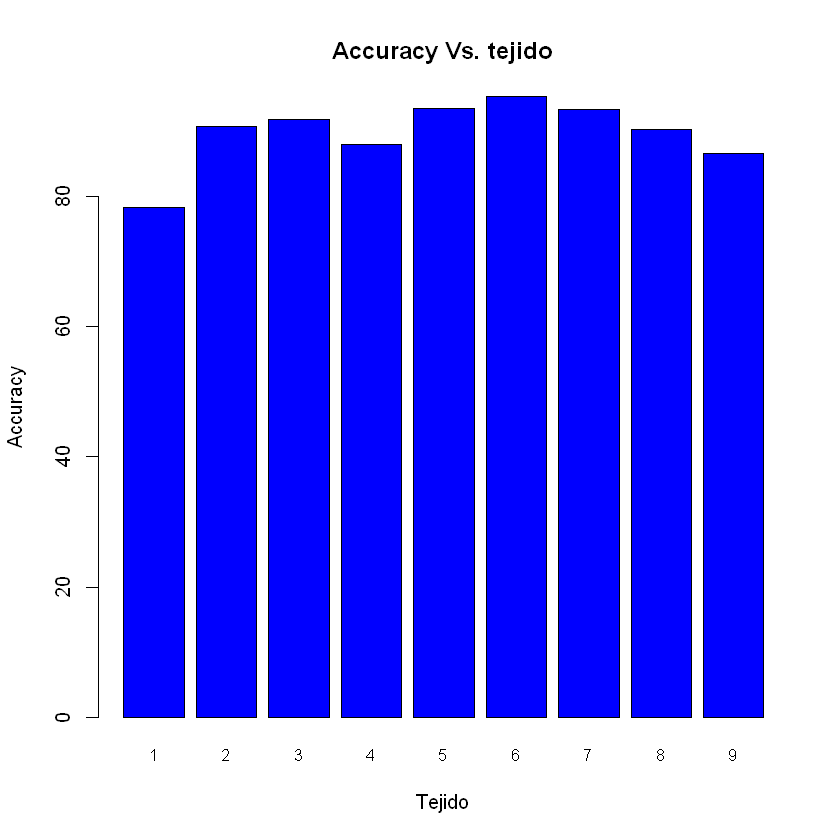

In [14]:
barplot(A,names.arg = 1:9,cex.names=0.8, ylab = "Accuracy", xlab="Tejido",col='blue',ylim=c(0,95),main="Accuracy Vs. tejido")

### KNN

In [20]:
## predicción sobre test con k=1
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 44  4 17  1  7 18  3  7  0
         2  1 60  9  7  6  5  9  1  0
         3 27  9 46  0 13 13  2  8  3
         4  0  2  0 79  2  1  9  1  0
         5  4  8  5 11 55 12 13 14  0
         6  9  6  5  3  5 39 12  8  1
         7  2  8  1  1  2 11 49  2  3
         8  4  5  7  1  2  4  5 65  0
         9  0  2  4  0  0  3  2  0 93

Overall Statistics
                                          
               Accuracy : 0.5889          
                 95% CI : (0.5559, 0.6213)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5378          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.48352  0.57692  0.48936  0.76699  0.59783  0.36792
Specificity           0.92954 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Rbm44, Olfr12, Bc1, A930009A15Rik, X4930401O12Rik, Cdh18, Mir875, Mir1249, Mir1941, X4833427F10Rik, X4930526L06Rik, X4930412B13Rik, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Mir3471.1, Svs1, Mir196b, Oscar, Gm10635, Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Rbm44, Olfr12, Bc1, A930009A15Rik, X4930401O12Rik, Cdh18, Mir875, Mir1249, Mir1941, X4833427F10Rik, X4930526L06Rik, X4930412B13Rik, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Mir3471.1, Svs1, Mir196b, Oscar, Gm10635, Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Rbm44, Olfr12, Bc1, A930009A15Rik, X4930401O12Rik, Cdh18, Mir875, Mir1249, Mir1941, X4833427F10Rik, X4930526L06Rik, X4930412B13Rik, Tubb1, Bir

"These variables have zero variances: Olfr12, Bc1, X4930401O12Rik, Mir875, Mir1249, Mir1941, X4833427F10Rik, Fam69c, X4930526L06Rik, X4930412B13Rik, Wfdc15a, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, X1700021N21Rik, Mir3471.1, Svs1, Mir196b, Oscar, Gm10635"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Olfr12, Bc1, X4930401O12Rik, Mir875, Mir1249, Mir1941, X4833427F10Rik, Fam69c, X4930526L06Rik, X4930412B13Rik, Wfdc15a, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, X1700021N21Rik, Mir3471.1, Svs1, Mir196b, Oscar, Gm10635"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Olfr12, Bc1, X4930401O12Rik, Mir875, Mir1249, Mir1941, X4833427F10Rik, Fam69c, X4930526L06Rik, X4930412B13Rik, Wfdc15a, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, X1700021N21Rik, Mir3471.1, Svs1, Mir196b, Oscar, Gm10635"Warning mess

,k
5,9


ERROR: Error in confusionMatrix.default(as.factor(predd2), as.factor(df.test2$y)): the data cannot have more levels than the reference


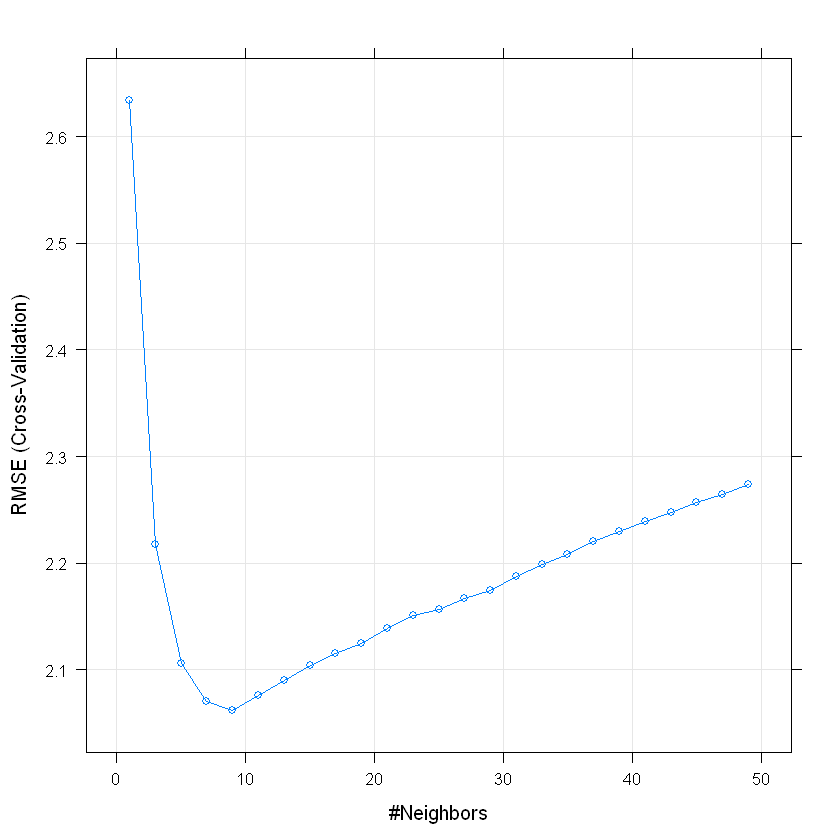

In [28]:
## búsqueda del k óptimo
trctrl=trainControl(method="cv", number=2) #divido mi train en 2, train y validation, de ahi saco mi model cv
knn.fit=train(y~.,df.train2, method="knn",trControl=trctrl, preProcess=c("center", "scale"), tuneGrid=expand.grid(k=seq(from = 1, to=50, by=2)))

plot(knn.fit)
knn.fit$bestTune
predd2 = predict(knn.fit, df.test2[,-ncol(df.test2)])
confusionMatrix(as.factor(predd2), as.factor(df.test2$y))

In [21]:
## predicción sobre test con k óptimo (9)
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=9)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 70  3 19  0  6 16  2  6  0
         2  0 65  9  1  0  7 16  1  4
         3 16  6 56  0 11 13  0 13  2
         4  0  2  0 84  2  0  6  0  0
         5  0  6  5 13 64 12 19 14  1
         6  2  7  0  1  4 35 10  2  0
         7  1  9  1  4  2 18 44  1  2
         8  2  5  1  0  3  3  6 69  0
         9  0  1  3  0  0  2  1  0 91

Overall Statistics
                                          
               Accuracy : 0.6422          
                 95% CI : (0.6099, 0.6736)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.598           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.76923  0.62500  0.59574  0.81553  0.69565  0.33019
Specificity           0.93572 

### Árboles de clasifición

In [15]:
df.train3=df.train2*1
df.test3=df.test2*1
df.train3$y=as.factor(df.train3$y)
df.test3$y=as.factor(df.test3$y)

In [16]:
## árbol completo
t = tree(formula = y ~ ., data = df.train3, control=tree.control(nrow(df.train3),mincut=1,minsize=2,mindev=0) )

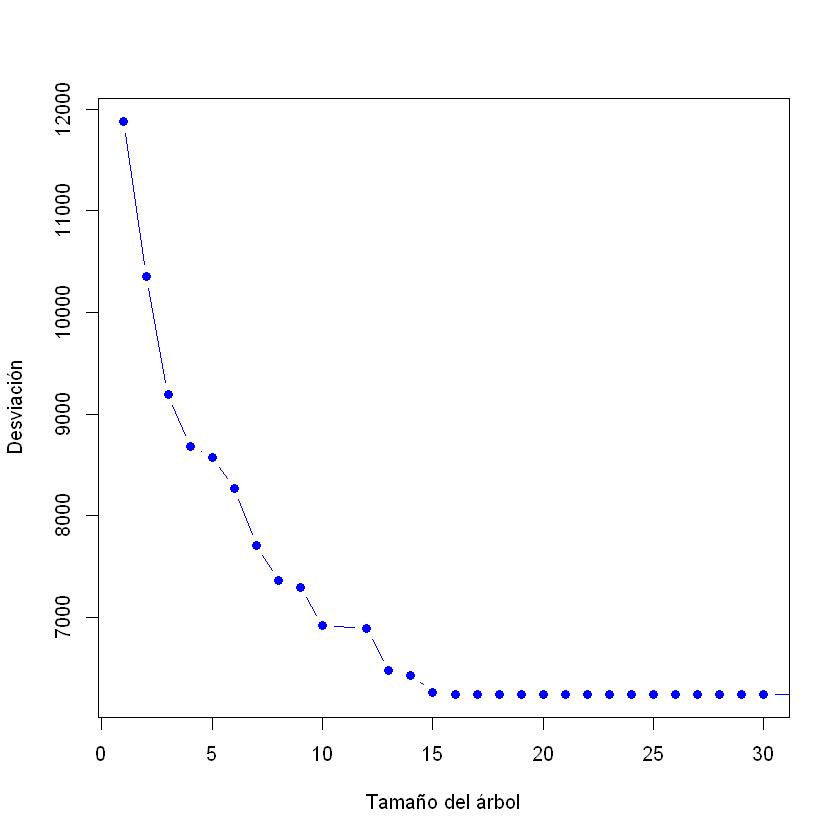

In [26]:
## búsqueda del tamaño de árbol óptimo
a=cv.tree(t, K = 10) #cross validation
plot(a$size,a$dev, xlab="Tamaño del árbol", ylab="Desviación", col="blue",type="b", pch=19,xlim=c(1,30))

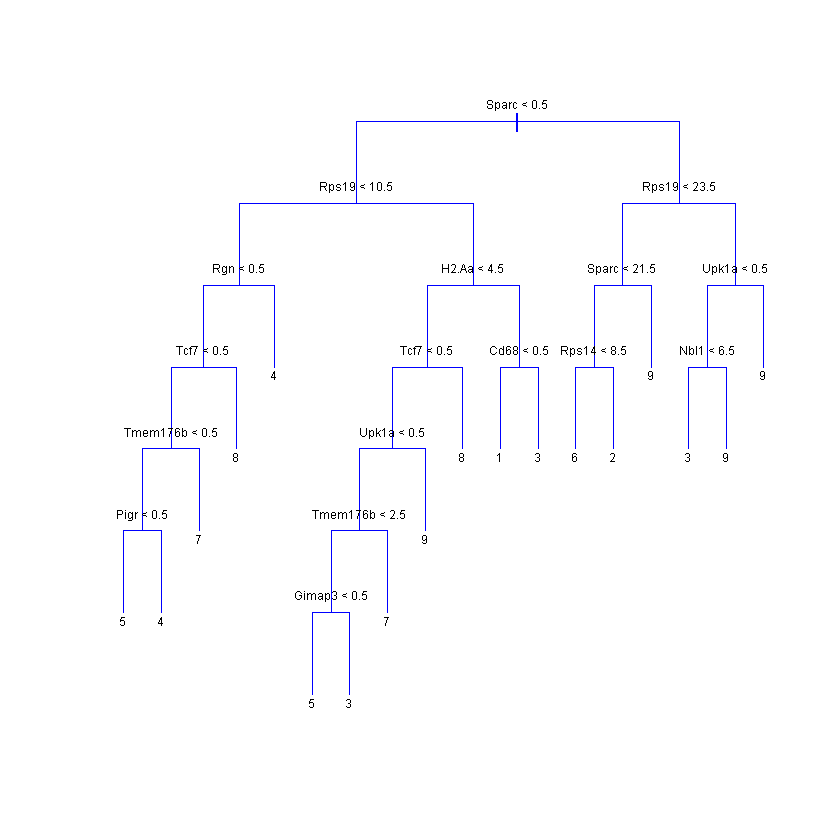

In [18]:
## podamos con tamaño óptimo
t.pruned=prune.tree(t, best = 18) #arbol podado
plot(t.pruned,type = "uniform",col="blue")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

In [26]:
#predicción sobre test
pred.test= predict(t.pruned, df.test3,type="class")
confusionMatrix(pred.test,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 65  3 16  0  6  8  2  2  1
         2  0 45  5  1  0 21 20  0  5
         3 14 26 37  0  7 13  7  6  2
         4  0  0  0 82  0  0  1  0  0
         5  4  8 12  7 73 33 18 15  0
         6  0 12  0  5  0 13  5  0  0
         7  0  5  3  8  6 10 49  1  1
         8  8  1 16  0  0  7  0 82  0
         9  0  4  5  0  0  1  2  0 91

Overall Statistics
                                          
               Accuracy : 0.5967          
                 95% CI : (0.5638, 0.6289)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5469          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.71429   0.4327  0.39362  0.79612  0.79348  0.12264
Specificity           0.95303 

### Random Forest


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 12

        OOB estimate of  error rate: 21.78%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 238   0  40   0   6  14   0  11   0  0.22977346
2   7 238   6   1  17   6  18   3   0  0.19594595
3  52  23 208   0   3   6   2   8   4  0.32026144
4   0   3   0 273  12   0   8   0   1  0.08080808
5  20   0  13   1 255   7   4   8   0  0.17207792
6  31  16  24   0  30 159  22  11   1  0.45918367
7   2  38   4  12  19  20 198   2   1  0.33108108
8   9   0  12   1   8   4   3 257   0  0.12585034
9   1   3   4   0   0   4   2   0 286  0.04666667

[1] 853 855 856

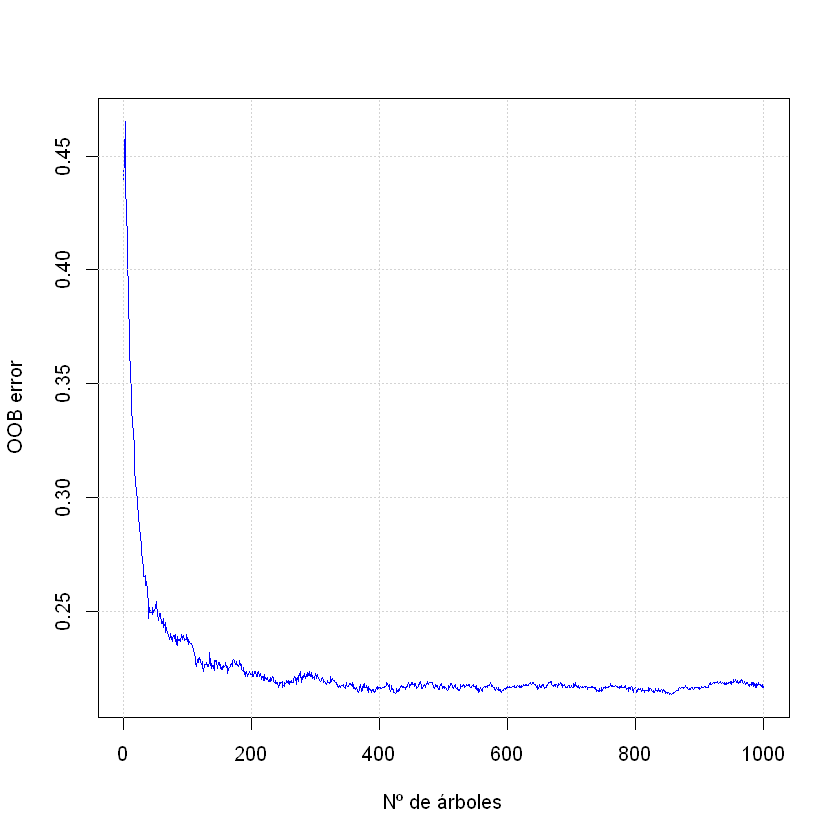

In [19]:
rf = randomForest(y ~., df.train3, ntree=1000)
rf
# OOB error
plot(rf$err.rate[, 1], type = "l", xlab = "Nº de árboles", col="blue",ylab = "OOB error")
grid()
# número óptimo de árboles 
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))
ntree

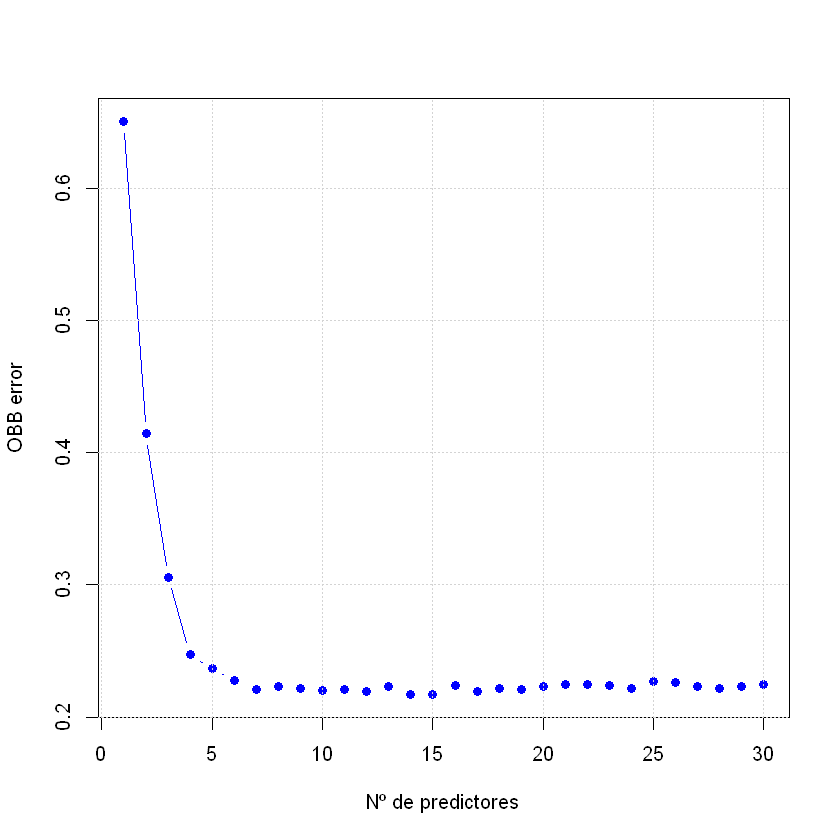

In [20]:
# búsqueda del número óptimo de predictores
err.oob = c()
for (mtry in 1:30) {
rf.mtry = randomForest(y ~., df.train3,ntree = ntree[1], mtry = mtry)
err.oob[mtry] = rf.mtry$err.rate[ntree[1], 1]
}

matplot(1:30 , err.oob, type = "b", pch = 19 ,lty = 1,ylab = "OBB error", col="blue",xlab = "Nº de predictores")
grid()

In [21]:
## modelo con parámetros óptimos
rf.occ = randomForest(y ~., df.train3, ntree = ntree[1], mtry = 14)
rf.occ
## predicción sobre test
pred.r = predict(rf.occ, df.test3)


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = ntree[1],      mtry = 14) 
               Type of random forest: classification
                     Number of trees: 853
No. of variables tried at each split: 14

        OOB estimate of  error rate: 22.3%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 235   1  39   0   6  15   0  13   0  0.23948220
2   8 240   4   1  16   6  18   3   0  0.18918919
3  52  22 206   0   5   6   4   7   4  0.32679739
4   0   3   0 273  14   0   7   0   0  0.08080808
5  18   1  17   1 253   8   4   6   0  0.17857143
6  33  16  26   0  33 153  24   9   0  0.47959184
7   3  38   5  13  18  20 196   2   1  0.33783784
8  10   0  13   1   7   3   3 257   0  0.12585034
9   1   3   4   0   0   5   2   0 285  0.05000000

In [22]:
confusionMatrix(pred.r,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 71  3 15  0 10 13  2  3  0
         2  0 86  8  2  0  4 13  0  2
         3 16  0 63  0  6 12  0  4  1
         4  0  0  0 95  0  0  3  0  0
         5  0  4  2  4 70  4  8  5  0
         6  2  1  0  1  3 60 10  1  0
         7  0  9  0  1  3  8 67  2  1
         8  2  1  2  0  0  3  0 91  0
         9  0  0  4  0  0  2  1  0 96

Overall Statistics
                                         
               Accuracy : 0.7767         
                 95% CI : (0.748, 0.8035)
    No Information Rate : 0.1178         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7488         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.78022  0.82692   0.6702   0.9223  0.76087  0.56604
Specificity           0.94314  0.96357

In [23]:
#Importancia de los genes
importancia=rf.occ$importance
i<-data.frame(importancia)
i2=i[order(i,decreasing = TRUE),]
genes=labels(importancia)[[1]]
genes=genes[order(i,decreasing = TRUE)]
dd=data.frame(i2,genes)
dd[1:20,]

i2,genes
151.18208,Rps19
147.26812,Rps14
117.94233,Sparc
109.62500,Rpl28
99.26791,Tcf7
94.86848,Rgn
88.22919,H2.Ab1
86.99851,H2.Aa
86.33477,Tmem176b
78.57350,Pigr


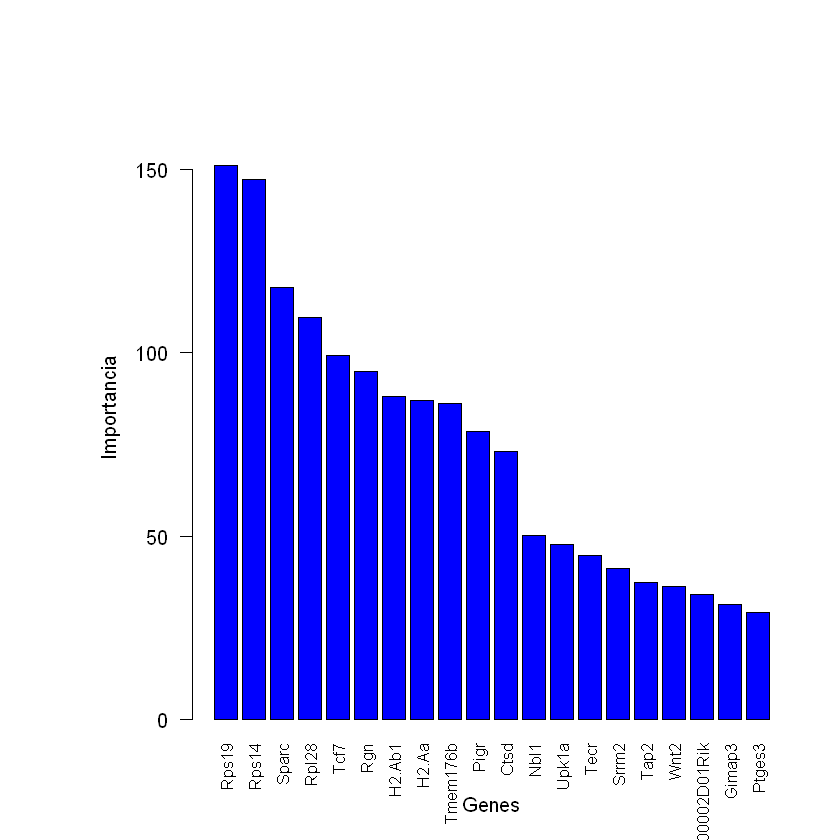

In [25]:
par(las=2) 
par(mar=c(5,8,4,2)) 
barplot(dd[1:20,1],names.arg = dd[1:20,2],cex.names=0.8, ylim=c(0,170),ylab = "Importancia", xlab="Genes",col = 'blue')